In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('gurgaon_feature engeenerring 1 approach 2.csv')

In [4]:
df.sample(5)

society price  area_persqft  bedRoom  bathroom  \
3446                        mian wali   1.7        9444.0      1.0       1.0   
2662  signature global orchard avenue   0.4        7359.0      2.0       2.0   
2527       central park flower valley   2.5       13270.0      3.0       3.0   
3321                              NaN   NaN        7500.0      NaN       NaN   
2818          signature global park 4  0.72        6428.0      3.0       2.0   

     balcony additionalRoom  floorNum facing agePossession  \
3446       1   servant room       1.0    NaN  Old Property   
2662       2   not avilable      11.0    NaN  New Property   
2527       2   not avilable       1.0    NaN     Undefined   
3321     NaN   not avilable       NaN    NaN     Undefined   
2818       3   not avilable       2.0    NaN     Undefined   

                                         furnishDetails  \
3446                                                NaN   
2662  ['1 Fan', '1 Exhaust Fan', '1 Geyser', '5 Ligh...   
2527  ['1 Light', 'No AC', 'No Bed', 'No Chimney', '...   
3321                                                NaN   
2818                                                NaN   

                                               features     sector  \
3446                                ['Visitor Parking']  sector 12   
2662  ['Security / Fire Alarm', 'Lift(s)', 'Maintena...  sector 93   
2527                                                NaN  sector 33   
3321                                                NaN  sector 21   
2818                                                NaN  sector 36   

               area   type  super_built_up_area  built_up_area  carpet_area  \
3446         1797.0  house                  NaN         1800.0          NaN   
2662   543.552sq-ft   flat                  NaN            NaN    543.57695   
2527  1883.949sq-ft   flat                  NaN            NaN   1884.00000   
3321         4004.0  house                  NaN         4004.0          NaN   
2818    1120.1sq-ft   flat                  NaN            NaN   1120.00000   

      study room  servant room  store room  pooja room  others  
3446           0             1           0           0       0  
2662           0             0           0           0       0  
2527           0             0           0           0       0  
3321           0             0           0           0       0  
2818           0             0           0           0       0

## furnishDetails

In [5]:
df['furnishDetails'].value_counts()

furnishDetails
[]                                                                                                                                                                                                                                                                       439
['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']     214
['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      75
['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fri

In [6]:
df['furnishDetails'].dtypes

dtype('O')

In [7]:
import re
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [8]:
furnishings_df

furnishDetails  Sofa  Bed  Chimney  \
0     ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...     0    0        0   
1     ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...     0    0        1   
2                                                   NaN     0    0        0   
3                                                   NaN     0    0        0   
4                                                    []     0    0        0   
5                                                   NaN     0    0        0   
6                                                    []     0    0        0   
7                                                    []     0    0        0   
8                                                   NaN     0    0        0   
9                                                   NaN     0    0        0   
10                                                  NaN     0    0        0   
11                                                  NaN     0    0        0   
12    ['1 Water Purifier', '2 Fan', '1 Geyser', '3 L...     0    0        0   
13                                                  NaN     0    0        0   
14                                                  NaN     0    0        0   
15    ['1 Light', 'No AC', 'No Bed', 'No Chimney', '...     0    0        0   
16                                                  NaN     0    0        0   
17                                                   []     0    0        0   
18                                                  NaN     0    0        0   
19    ['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...     0    0        1   
20                                                  NaN     0    0        0   
21    ['5 AC', '1 Chimney', '1 Modular Kitchen', 'No...     0    0        1   
22                                                   []     0    0        0   
23    ['5 Wardrobe', '8 Fan', '1 Exhaust Fan', '20 L...     0    0        0   
24                                                  NaN     0    0        0   
25                                                  NaN     0    0        0   
26    ['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...     0    0        0   
27                                                  NaN     0    0        0   
28    ['6 Fan', '1 Exhaust Fan', '4 Geyser', '55 Lig...     0    0        1   
29                                                  NaN     0    0        0   
30    ['1 Light', 'No AC', 'No Bed', 'No Chimney', '...     0    0        0   
31                                                  NaN     0    0        0   
32    ['7 Fan', '11 Light', '7 AC', '1 Modular Kitch...     0    0        1   
33    ['1 Modular Kitchen', '2 Wardrobe', 'No AC', '...     0    0        0   
34                                                  NaN     0    0        0   
35    ['1 Light', 'No AC', 'No Bed', 'No Chimney', '...     0    0        0   
36                                                  NaN     0    0        0   
37                                                  NaN     0    0        0   
38    ['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Ch...     0    0        0   
39    ['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Ge...     0    0        1   
40    ['3 Bed', '5 Wardrobe', '6 Fan', '1 Sofa', '1 ...     1    3        0   
41    ['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...     0    0        0   
42                                                   []     0    0        0   
43                                                  NaN     0    0        0   
44    ['2 Fan', '2 Geyser', '6 Light', '1 Chimney', ...     0    0        1   
45                                                   []     0    0        0   
46    ['8 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stov...     0    0        1   
47    ['3 Fan', '2 Geyser', '7 Light', '3 AC', 'No B...     0    0        0   
48    ['1 Exhaust Fan', '1 Modular Kitchen', 'No AC'...     0    0        0   
49    ['1 Water Purifier', '7 Fan', '1 Fridge', '1 E...     0    0        1   
50    ['1 Fa

In [9]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_28480/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [10]:
furnishings_df.sample(5)

Sofa  Bed  Chimney  TV  Wardrobe  Stove  AC  Modular Kitchen  Curtains  \
431      0    0        1   0         3      0   0                1         0   
1793     0    0        0   0         0      0   0                0         0   
1493     0    0        1   0         4      1   5                1         1   
164      0    0        1   0         4      0   0                1         0   
1664     0    0        1   0         0      0   0                1         0   

      Exhaust Fan  Geyser  Fan  Dining Table  Light  Fridge  Microwave  \
431             0       2    5             0      5       0          0   
1793            0       0    0             0      0       0          0   
1493            1       5    7             0     12       0          0   
164             0       1    3             0      5       0          0   
1664            0       0    7             0      7       0          0   

      Water Purifier  Washing Machine  
431                0                0  
1793               0                0  
1493               0                0  
164                0                0  
1664               0                0

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)


In [12]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/Users/abhijeetkashyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/abhijeetkashyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/abhijeetkashyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/abhijeetkashyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

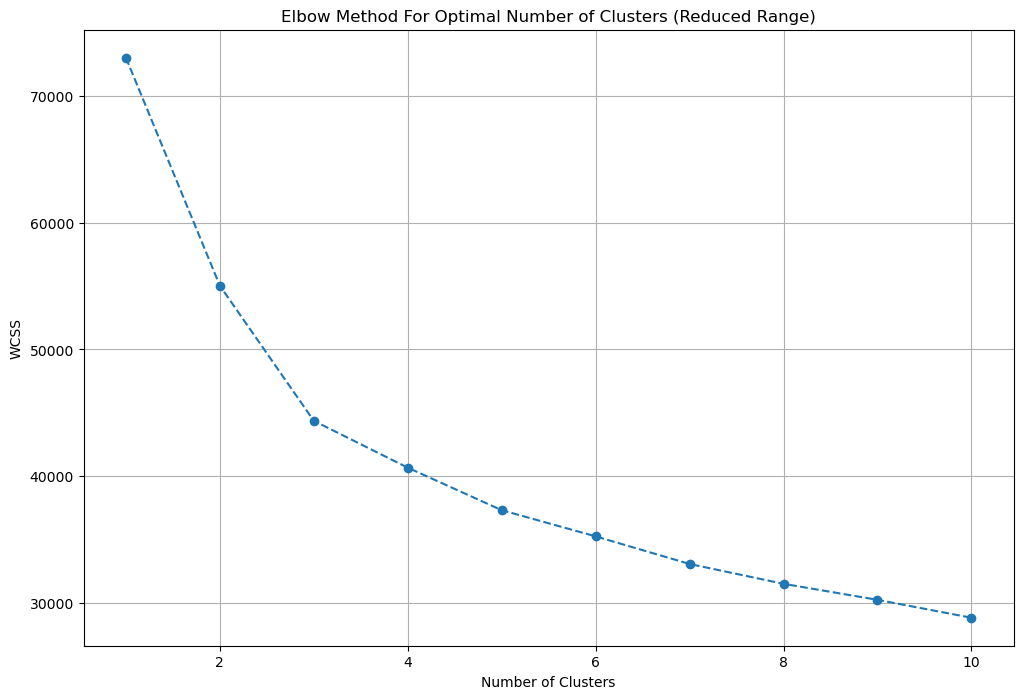

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [14]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters,init='k-means++',random_state=42 )
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/Users/abhijeetkashyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
cluster_assignments

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

In [16]:
df['furnishing_type'] = cluster_assignments
df.sample(5)[['furnishDetails','furnishing_type']]


furnishDetails  furnishing_type
284                                                 NaN                2
3714  ['8 Wardrobe', '9 Fan', '1 Exhaust Fan', '9 Li...                0
319                                                 NaN                2
3919                                                NaN                2
3168                                                 []                2

In [17]:
df['furnishing_type'].value_counts()

furnishing_type
2    2725
0    1107
1     225
Name: count, dtype: int64

In [23]:
df[df['furnishing_type']==0][['furnishDetails','furnishing_type']]

furnishDetails  furnishing_type
1     ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...                0
19    ['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...                0
23    ['5 Wardrobe', '8 Fan', '1 Exhaust Fan', '20 L...                0
28    ['6 Fan', '1 Exhaust Fan', '4 Geyser', '55 Lig...                0
32    ['7 Fan', '11 Light', '7 AC', '1 Modular Kitch...                0
39    ['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Ge...                0
46    ['8 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stov...                0
50    ['1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Ligh...                0
55    ['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '2 Ge...                0
57    ['1 Wardrobe', '2 Fan', '1 Exhaust Fan', '1 Ge...                0
65    ['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 St...                0
74    ['6 Fan', '1 Exhaust Fan', '1 Chimney', '4 Cur...                0
101   ['1 Exhaust Fan', '1 AC', '1 Chimney', '1 Modu...                0
102   ['3 Fan', '1 Exhaust Fan', '2 Geyser', '3 Ligh...                0
105   ['3 Wardrobe', '1 Exhaust Fan', '1 Stove', '10...                0
115   ['4 Wardrobe', '1 Water Purifier', '2 Fan', '1...                0
124   ['10 Wardrobe', '1 Water Purifier', '5 Fan', '...                0
137   ['1 Fan', '1 Exhaust Fan', '2 Geyser', '1 Ligh...                0
143   ['4 Wardrobe', '1 Exhaust Fan', '1 Modular Kit...                0
144   ['1 Wardrobe', '1 Water Purifier', '1 Fan', '1...                0
149   ['2 Wardrobe', '1 Water Purifier', '5 Fan', '1...                0
156   ['1 Wardrobe', '3 Fan', '1 Exhaust Fan', '6 Li...                0
164   ['3 Fan', '1 Geyser', '5 Light', '1 Chimney', ...                0
165   ['3 Wardrobe', '1 Water Purifier', '5 Fan', '1...                0
169   ['2 Wardrobe', '1 Exhaust Fan', '2 Geyser', '4...                0
180   ['1 Water Purifier', '6 Fan', '2 Geyser', '6 L...                0
195   ['1 Water Purifier', '3 Fan', '1 Exhaust Fan',...                0
204   ['5 Fan', '1 Exhaust Fan', '3 Geyser', '12 Lig...                0
216   ['2 Wardrobe', '1 Exhaust Fan', '14 Light', '1...                0
221   ['1 Water Purifier', '4 Fan', '2 Geyser', '1 S...                0
224   ['2 Wardrobe', '1 Water Purifier', '5 Fan', '1...                0
226   ['4 Fan', '1 Exhaust Fan', '2 Geyser', '8 Ligh...                0
236   ['3 Wardrobe', '7 Fan', '2 Geyser', '1 Stove',...                0
238   ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...                0
240   ['3 Fan', '1 Exhaust Fan', '1 Geyser', '8 Ligh...                0
244   ['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '4 Li...                0
246   ['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Ge...                0
258   ['2 Wardrobe', '1 Exhaust Fan', '16 Light', '1...                0
265   ['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...                0
273   ['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Ge...                0
286   ['1 Geyser', '1 Microwave', '6 Light', '6 AC',...                0
290   ['3 Wardrobe', '5 Fan', '3 Geyser', '1 Stove',...                0
291   ['5 Wardrobe', '1 Geyser', '99 Light', '3 AC',...                0
300   ['3 Wardrobe', '1 Exhaust Fan', '3 Geyser', '1...                0
302   ['1 Water Purifier', '6 Fan', '1 Exhaust Fan',...                0
303   ['6 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Ge...                0
308   ['3 Wardrobe', '1 Water Purifier', '7 Fan', '1...                0
314   ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...                0
315   ['4 Wardrobe', '7 Fan', '5 Geyser', '10 Light'...                0
318   ['3 Wardrobe', '1 Water Purifier', '5 Fan', '1...                0
322   ['3 Wardrobe', '5 Fan', '3 Geyser', '1 Stove',...                0
327   ['3 Wardrobe', '1 Exhaust Fan', '3 Geyser', '1...                0
329   ['1 Water Purifier', '6 Fan', '1 Exhaust Fan',...                0
330   ['6 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Ge...                0
334   ['3 Wardrobe', '1 Wa

In [25]:
df.drop(columns=['Sofa', 'Bed',
       'Chimney', 'TV', 'Wardrobe', 'Stove', 'AC', 'Modular Kitchen',
       'Curtains', 'Exhaust Fan', 'Geyser', 'Fan', 'Dining Table', 'Light',
       'Fridge', 'Microwave', 'Water Purifier', 'Washing Machine','furnishDetails'],axis=1,inplace=True)

In [26]:
df.columns

Index(['society', 'price', 'area_persqft', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'floorNum', 'facing', 'agePossession', 'features',
       'sector', 'area', 'type', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type'],
      dtype='object')

In [27]:
df.sample(5)

society price  area_persqft  bedRoom  bathroom  \
3568                            NaN  2.43       14890.0      4.0       4.0   
251   shyamkunj ashok vihar pahse 2   0.3        4444.0      2.0       2.0   
2190            trisara our homes 3  0.35        5564.0      2.0       2.0   
3552                            NaN  1.85       16003.0      4.0       3.0   
3461                            NaN  0.47        8012.0      2.0       1.0   

     balcony                    additionalRoom  floorNum      facing  \
3568       2  pooja room,study room,store room       3.0  South-West   
251        1                      not avilable       1.0        East   
2190       1                      not avilable       2.0       North   
3552       2                      not avilable       3.0         NaN   
3461       1                        store room       1.0        East   

       agePossession                                           features  \
3568    Old Property  ['Water Storage', 'Park', 'Visitor Parking', '...   
251   Relatively New  ['High Ceiling Height', 'Maintenance Staff', '...   
2190    New Property  ['Security / Fire Alarm', 'Intercom Facility',...   
3552       Undefined                                                NaN   
3461  Moderately Old                                                NaN   

                sector                     area   type  super_built_up_area  \
3568          sector 7    (152 sq.m.) Plot Area  house                  NaN   
251   sector 3 phase 2             675.068sq-ft   flat                  NaN   
2190        sohna road             629.044sq-ft   flat                  NaN   
3552          sector 1  (107 sq.m.) Carpet Area  house                  NaN   
3461          sector 4                    624.0  house                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
3568          345.0          NaN           1             0           1   
251             NaN        675.0           0             0           0   
2190            NaN        629.0           0             0           0   
3552            NaN       1156.0           0             0           0   
3461          624.0          NaN           0             0           1   

      pooja room  others  furnishing_type  
3568           1       0                2  
251            0       0                2  
2190           0       0                2  
3552           0       0                2  
3461           0       0                2

## features

In [30]:
df['features'].head(5)

0    ['Feng Shui / Vaastu Compliant', 'Security / F...
1    ['Security / Fire Alarm', 'Maintenance Staff',...
2    ['Power Back-up', 'Feng Shui / Vaastu Complian...
3    ['Security / Fire Alarm', 'Private Garden / Te...
4                                                  NaN
Name: features, dtype: object

In [31]:
df['features'].value_counts()

features
['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              290
['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for ser

In [32]:
df['features'].isnull().sum()

794

In [28]:
df2=pd.read_excel('/Users/abhijeetkashyap/Desktop/project version 1/real_estate_data.xlsx',)

In [33]:
df2.head()

PropertyName  \
0           Smartworld One DXP   
1                    M3M Crown   
2  Adani Brahma Samsara Vilasa   
3                   Sobha City   
4     Signature Global City 93   

                                     PropertySubName  \
0       2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1          3, 4 BHK Apartment in Sector 111, Gurgaon   
2  Land, 3, 4 BHK Independent Floor in Sector 63,...   
3       2, 3, 4 BHK Apartment in Sector 108, Gurgaon   
4    2, 3 BHK Independent Floor in Sector 93 Gurgaon   

                                     NearbyLocations  \
0  ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...   
1  ['DPSG Palam Vihar Gurugram', 'The NorthCap Un...   
2  ['AIPL Business Club Sector 62', 'Heritage Xpe...   
3  ['The Shikshiyan School', 'WTC Plaza', 'Luxus ...   
4  ['Pranavananda Int. School', 'DLF Site central...   

                                  LocationAdvantages  \
0  {'Bajghera Road': '800 Meter', 'Palam Vihar Ha...   
1  {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...   
2  {'AIPL Business Club Sector 62': '2.7 Km', 'He...   
3  {'The Shikshiyan School': '2.9 KM', 'WTC Plaza...   
4  {'Pranavananda Int. School': '450 m', 'DLF Sit...   

                                                Link  \
0  https://www.99acres.com/smartworld-one-dxp-sec...   
1  https://www.99acres.com/m3m-crown-sector-111-g...   
2  https://www.99acres.com/adani-brahma-samsara-v...   
3  https://www.99acres.com/sobha-city-sector-108-...   
4  https://www.99acres.com/signature-global-city-...   

                                        PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area...   
1  {'3 BHK': {'building_type': 'Apartment', 'area...   
2  {'3 BHK': {'building_type': 'Independent Floor...   
3  {'2 BHK': {'building_type': 'Apartment', 'area...   
4  {'2 BHK': {'building_type': 'Independent Floor...   

                                       TopFacilities  
0  ['Swimming Pool', 'Salon', 'Restaurant', 'Spa'...  
1  ['Bowling Alley', 'Mini Theatre', 'Manicured G...  
2  ['Terrace Garden', 'Gazebo', 'Fountain', 'Amph...  
3  ['Swimming Pool', 'Volley Ball Court', 'Aerobi...  
4  ['Mini Theatre', 'Doctor on Call', 'Concierge ...

In [34]:
df2['PropertyName'] = df2['PropertyName'].str.lower()

In [36]:
temp=df[df['features'].isnull()]

In [37]:
temp.shape

(794, 23)

In [39]:
x = temp.merge(df2,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
df.loc[temp.index,'features'] = x.values

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
5      ['Swimming Pool', 'Volley Ball Court', 'Aerobi...
6                                                    NaN
7      ['Swimming Pool', 'Lounge', 'Aerobics Centre',...
8                                                    NaN
9                                                    NaN
10     ['Mini Theatre', 'Doctor on Call', 'Beach Voll...
11     ['Mini Theatre', 'Foosball', 'Swimming Pool', ...
12                                                   NaN
13                                                   NaN
14     ['Swimming Pool', 'School', 'Sauna', 'Steam Ro...
15                                                   NaN
16                                                   NaN
17                             

In [41]:
df['features'].isnull().sum()

591

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)
features_binary_df.sample(5)

24/7 Power Backup  24/7 Water Supply  24x7 Security  ATM  \
3159                  0                  0              0    0   
387                   0                  0              0    0   
827                   0                  0              0    0   
473                   0                  0              0    0   
3434                  0                  0              0    0   

      Aerobics Centre  Air Hockey  Airy Rooms  Amphitheatre  \
3159                0           0           0             0   
387                 0           0           1             0   
827                 0           0           1             0   
473                 0           0           1             0   
3434                0           0           0             0   

      Automated Car Wash  Badminton Court  Bank Attached Property  \
3159                   0                0                       0   
387                    0                0                       0   
827                    0                0                       0   
473                    0                0                       0   
3434                   0                0                       0   

      Banquet Hall  Bar/Chill-Out Lounge  Barbecue  Basketball Court  \
3159             0                     0         0                 0   
387              0                     0         0                 0   
827              0                     0         0                 0   
473              0                     0         0                 0   
3434             0                     0         0                 0   

      Beach Volley Ball Court  Billiards  Bowling Alley  Bus Shelter  \
3159                        0          0              0            0   
387                         0          0              0            0   
827                         0          0              0            0   
473                         0          0              0            0   
3434                        0          0              0            0   

      Business Lounge  CCTV Camera Security  Cafeteria  Car Parking  \
3159                0                     0          0            0   
387                 0                     0          0            0   
827                 0                     0          0            0   
473                 0                     0          0            0   
3434                0                     0          0            0   

      Car wash area  Card Room  Centrally Air Conditioned  Changing Area  \
3159              0          0                          0              0   
387               0          0                          0              0   
827               0          0                          0              0   
473               0          0                          0              0   
3434              0          0                          0              0   

      Children's Play Area  Cigar Lounge  Clinic  Club House  \
3159                     0             0       0           0   
387                      0             0       0           0   
827                      0             0       0           0   
473                      0             0       0           0   
3434                     0             0       0           0   

      Club house / Community Center  Community Hall  Concierge Service  \
3159                              0               0                  0   
387                               0               0                  0   
827                               1               0                  0   
473                               1               0                  0   
3434                              0               0                  0   

      Conference room  Creche/Day care  Cricket Pitch  Doctor on Call  \
3159                0                0              0               0   
387                 0                0              0               0   
827             

In [43]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [44]:
luxury_score

0        28
1        37
2        36
3        76
4         0
5         0
6         0
7        60
8        58
9       100
10       49
11       44
12        0
13        0
14       15
15       59
16        0
17       49
18      104
19       49
20       38
21       49
22       45
23       95
24       72
25        0
26        0
27       34
28       49
29       42
30       60
31        0
32      119
33       14
34        0
35       60
36       72
37       83
38      109
39      103
40       15
41       67
42       49
43      130
44        0
45       46
46      102
47       97
48      110
49       72
50       38
51       52
52       49
53       16
54       46
55       44
56        9
57       22
58       37
59        0
60        0
61       80
62       37
63       97
64      109
65       62
66       51
67       55
68       60
69       50
70        0
71       49
72       37
73       43
74       90
75       44
76       42
77      111
78        0
79       95
80       75
81       61
82       15
83  

In [45]:
df['luxury_score'] = luxury_score

In [46]:
df.sample(5)

society price  area_persqft  bedRoom  bathroom balcony  \
3427                 NaN   1.0       11111.0      3.0       4.0       2   
3441      not applicable   0.8       54794.0      5.0       4.0       3   
2890  valley view estate  0.38        6089.0      1.0       1.0       1   
1581         ss the leaf  1.18       10094.0      2.0       3.0       3   
2566          mvn athens  0.26        5397.0      2.0       2.0       1   

     additionalRoom  floorNum facing       agePossession  \
3427   not avilable       2.0    NaN      Relatively New   
3441   not avilable       3.0    NaN  Under Construction   
2890   not avilable      11.0    NaN      Moderately Old   
1581     pooja room      12.0  North      Relatively New   
2566   not avilable       5.0    NaN      Relatively New   

                                               features            sector  \
3427                                                NaN  sector 3 phase 2   
3441                                                NaN          sector 4   
2890  ['Feng Shui / Vaastu Compliant', 'Security / F...       gwal pahari   
1581  ['Centrally Air Conditioned', 'Water purifier'...         sector 85   
2566  ['Security / Fire Alarm', 'Power Back-up', 'Fe...        sohna road   

               area   type  super_built_up_area  built_up_area  carpet_area  \
3427          904.0  house                  NaN          900.0          NaN   
3441          151.0  house                  NaN          146.0          NaN   
2890   624.076sq-ft   flat                624.0            NaN          NaN   
1581  1169.011sq-ft   flat               1671.0         1420.0  1169.000000   
2566   481.749sq-ft   flat                  NaN            NaN   481.684525   

      study room  servant room  store room  pooja room  others  \
3427           0             0           0           0       0   
3441           0             0           0           0       0   
2890           0             0           0           0       0   
1581           0             0           0           1       0   
2566           0             0           0           0       0   

      furnishing_type                                      features_list  \
3427                2                                                 []   
3441                2                                                 []   
2890                2  [Feng Shui / Vaastu Compliant, Security / Fire...   
1581                0  [Centrally Air Conditioned, Water purifier, Se...   
2566                2  [Security / Fire Alarm, Power Back-up, Feng Sh...   

      luxury_score  
3427             0  
3441             0  
2890            42  
1581           150  
2566            95

In [47]:
df.drop(columns=['features',],axis=1,inplace=True)

In [48]:
df.sample(5)

society price  area_persqft  bedRoom  bathroom  \
3467                     jacobpura  0.53       14583.0      4.0       4.0   
3617                           NaN   0.8        8155.0      5.0       4.0   
3567                           NaN   0.6        6000.0      1.0       1.0   
1670           adani oyster greens   1.9       10058.0      3.0       3.0   
1854  nagata group housing society  0.85        3695.0      3.0       3.0   

     balcony                    additionalRoom  floorNum      facing  \
3467       2                      not avilable       3.0        East   
3617       1                      not avilable       2.0         NaN   
3567       0                      not avilable       1.0         NaN   
1670      3+  pooja room,study room,store room       9.0  North-East   
1854      3+                      servant room       4.0       North   

       agePossession      sector                      area   type  \
3467  Relatively New   sector 12                     355.0  house   
3617  Moderately Old    sector 3                     979.0  house   
3567       Undefined    sector 3  (93 sq.m.) Built-up Area  house   
1670  Relatively New  sector 102             1889.044sq-ft   flat   
1854  Relatively New    sector 1             2300.406sq-ft   flat   

      super_built_up_area  built_up_area  carpet_area  study room  \
3467                  NaN          360.0          NaN           0   
3617                  NaN          981.0          NaN           0   
3567                  NaN         1000.0          NaN           0   
1670                  NaN            NaN       1889.0           1   
1854               2300.0            NaN          NaN           0   

      servant room  store room  pooja room  others  furnishing_type  \
3467             0           0           0       0                2   
3617             0           0           0       0                2   
3567             0           0           0       0                2   
1670             0           1           1       0                2   
1854             1           0           0       0                2   

                                  features_list  luxury_score  
3467                                         []             0  
3617                                         []             0  
3567                                         []             0  
1670                                         []             0  
1854  [Feng Shui / Vaastu Compliant, Piped-gas]             5

In [49]:
df.drop(columns=['features_list'],axis=1,inplace=True)

In [50]:
df.sample(5)

society price  area_persqft  bedRoom  \
1584                        m3m woodshire  1.45        6141.0      3.0   
2450                      sare green parc  0.75        4820.0      3.0   
3086  international city by sobha phase 1   NaN       11100.0      NaN   
1595               experion the heartsong   0.9        7014.0      2.0   
3460                                  NaN  0.32        7111.0      2.0   

      bathroom balcony additionalRoom  floorNum      facing   agePossession  \
1584       4.0      3+   servant room       7.0       South  Relatively New   
2450       2.0       2   not avilable      16.0         NaN       Undefined   
3086       NaN     NaN   not avilable       NaN         NaN       Undefined   
1595       3.0       3   servant room       2.0       South  Relatively New   
3460       3.0       1   not avilable       1.0  North-East  Relatively New   

          sector                      area   type  super_built_up_area  \
1584  sector 107             2361.179sq-ft   flat               2361.0   
2450   sector 92             1556.017sq-ft   flat                  NaN   
3086  sector 109                    3154.0  house                  NaN   
1595  sector 108             1283.148sq-ft   flat               1283.0   
3460    sector 8  (42 sq.m.) Built-up Area  house                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
1584    1900.000000          NaN           0             1           0   
2450    1556.000000  1261.000000           0             0           0   
3086    3154.000000          NaN           0             0           0   
1595     978.223232   734.420897           0             1           0   
3460     450.000000   300.000000           0             0           0   

      pooja room  others  furnishing_type  luxury_score  
1584           0       0                2            67  
2450           0       0                2             0  
3086           0       0                2            54  
1595           0       0                2            94  
3460           0       0                2             0

In [51]:
df.columns

Index(['society', 'price', 'area_persqft', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'floorNum', 'facing', 'agePossession', 'sector',
       'area', 'type', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [52]:
df[['study room', 'servant room', 'store room', 'pooja room', 'others']].sample(5)

study room  servant room  store room  pooja room  others
2372           0             0           0           0       0
943            0             0           1           0       0
3719           0             1           0           1       0
1802           0             0           0           0       0
195            0             0           0           0       0

In [53]:
temp_df=df[['study room', 'servant room', 'store room', 'pooja room', 'others']]

In [61]:
df[df['others']==2]

Empty DataFrame
Columns: [society, price, area_persqft, bedRoom, bathroom, balcony, additionalRoom, floorNum, facing, agePossession, sector, area, type, super_built_up_area, built_up_area, carpet_area, study room, servant room, store room, pooja room, others, furnishing_type, luxury_score]
Index: []